# Exoplanet Detection with AI/ML

This notebook implements machine learning models to detect exoplanets from NASA's cleaned exoplanet survey data.

## Dataset
- **File**: `cleaned_data.csv` (1,782 samples, 41 features)
- **Target**: `tfopwg_disp` (0=Not Exoplanet, 1=Exoplanet)
- **Features**: 40 exoplanet-related features (orbital period, transit depth, stellar properties, etc.)

## Models
- XGBoost
- CatBoost (with compatibility fixes)
- SVM (Support Vector Machine)

## Data Processing
- **Normalization**: StandardScaler applied to all features
- **Comparison**: Models trained with and without normalization

## Data Split
- 60% Training
- 20% Validation
- 20% Testing


## 1. Import Libraries and Setup


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Data Loading and Exploration


In [6]:
# Load the cleaned dataset
data_path = 'cleaned_data.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Target column 'tfopwg_disp' distribution:")
    print(df['tfopwg_disp'].value_counts())
    print(f"Target column proportions:")
    print(df['tfopwg_disp'].value_counts(normalize=True))
except FileNotFoundError:
    print("Error: cleaned_data.csv not found. Please ensure the file is in the same directory as this notebook.")


Dataset loaded successfully!
Shape: (1782, 41)
Columns: ['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2']
Target column 'tfopwg_disp' distribution:
tfopwg_disp
1    970
0    812
Name: count, dtype: int64
Target column proportions:
tfopwg_disp
1    0.544332
0    0.455668
Name: proportion, dtype: float64


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumn types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nFirst few rows:")
df.head()


Dataset Info:
Shape: (1782, 41)

Column types:
tfopwg_disp          int64
ra                 float64
dec                float64
st_pmra            float64
st_pmraerr1        float64
st_pmraerr2        float64
st_pmdec           float64
st_pmdecerr1       float64
st_pmdecerr2       float64
pl_tranmid         float64
pl_tranmiderr1     float64
pl_tranmiderr2     float64
pl_orbper          float64
pl_orbpererr1      float64
pl_orbpererr2      float64
pl_trandurh        float64
pl_trandurherr1    float64
pl_trandurherr2    float64
pl_trandep         float64
pl_trandeperr1     float64
pl_trandeperr2     float64
pl_rade            float64
pl_radeerr1        float64
pl_radeerr2        float64
pl_insol           float64
pl_eqt             float64
st_tmag            float64
st_tmagerr1        float64
st_tmagerr2        float64
st_dist            float64
st_disterr1        float64
st_disterr2        float64
st_teff            float64
st_tefferr1        float64
st_tefferr2        float64
st_logg 

,tfopwg_disp,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,st_pmdecerr2,pl_tranmid,...,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_loggerr1,st_loggerr2,st_rad,st_raderr1,st_raderr2
0,0,112.357708,-12.695960,-5.964,0.085,-0.085,-0.076,0.072,-0.072,2.459230e+06,...,-11.9515,10249.0,264.7,-264.7,4.19,0.07,-0.07,2.16986,0.072573,-0.072573
1,0,122.178195,-48.802811,-4.496,0.069,-0.069,9.347,0.062,-0.062,2.459987e+06,...,-4.6175,9219.0,171.1,-171.1,4.14,0.07,-0.07,2.15000,0.060000,-0.060000
2,0,116.110771,-36.098285,-9.231,0.048,-0.048,11.614,0.052,-0.052,2.459239e+06,...,-3.7840,7601.0,135.8,-135.8,4.31,0.08,-0.08,1.53641,0.047980,-0.047980
3,0,124.726411,-37.783250,-11.278,0.045,-0.045,9.593,0.045,-0.045,2.458519e+06,...,-4.7245,6995.2,157.0,-157.0,4.07,0.55,-0.55,1.61000,0.070000,-0.070000
4,0,111.716019,-50.266567,-8.018,0.049,-0.049,11.560,0.047,-0.047,2.458493e+06,...,-2.9645,5889.0,124.3,-124.3,3.86,0.07,-0.07,2.00000,0.090000,-0.090000


Target variable distribution:
tfopwg_disp
1    970
0    812
Name: count, dtype: int64

Proportions:
tfopwg_disp
1    0.544332
0    0.455668
Name: proportion, dtype: float64


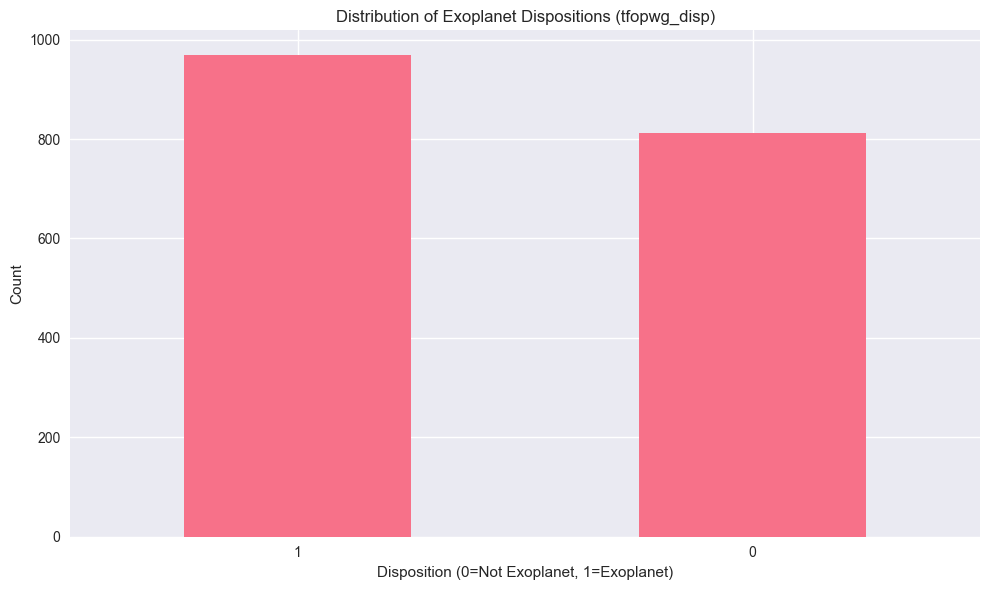

In [8]:
# Check target variable distribution
if 'tfopwg_disp' in df.columns:
    print("Target variable distribution:")
    print(df['tfopwg_disp'].value_counts())
    print(f"\nProportions:")
    print(df['tfopwg_disp'].value_counts(normalize=True))
    
    # Visualize target distribution
    plt.figure(figsize=(10, 6))
    df['tfopwg_disp'].value_counts().plot(kind='bar')
    plt.title('Distribution of Exoplanet Dispositions (tfopwg_disp)')
    plt.xlabel('Disposition (0=Not Exoplanet, 1=Exoplanet)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Target variable 'tfopwg_disp' not found in the dataset.")
    print("Available columns:", list(df.columns))


## 3. Data Preparation with Normalization
 

In [10]:
# Prepare data with normalization
df_processed = df.copy()

print("Preparing data with normalization...")
print(f"Dataset shape: {df_processed.shape}")
print(f"Missing values: {df_processed.isnull().sum().sum()}")
print(f"Columns: {list(df_processed.columns)}")

# Handle any remaining missing values
if df_processed.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df_processed = df_processed.fillna(df_processed.median())
    print(f"Missing values after filling: {df_processed.isnull().sum().sum()}")


Preparing data with normalization...
Dataset shape: (1782, 41)
Missing values: 0
Columns: ['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2']


In [11]:
# Prepare features and target (using raw data)
if 'tfopwg_disp' in df_processed.columns:
    # Use tfopwg_disp as target: 1 for exoplanets, 0 for non-exoplanets
    y = df_processed['tfopwg_disp']
    
    # Remove the target column from features
    X = df_processed.drop(columns=['tfopwg_disp'])
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Exoplanet ratio: {y.mean():.3f}")
    print(f"Features: {list(X.columns)}")
else:
    print("Target variable 'tfopwg_disp' not found. Please check your dataset.")
    X = df_processed
    y = None


Features shape: (1782, 40)
Target shape: (1782,)
Exoplanet ratio: 0.544
Features: ['ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2']


In [12]:
# Apply normalization to features
print("Applying StandardScaler normalization...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"Final features shape: {X_scaled.shape}")
print(f"Feature names: {list(X_scaled.columns)}")
print("✅ Features normalized using StandardScaler")

# Also keep raw features for comparison
X_raw = X.copy()
print("✅ Raw features saved for comparison")


Applying StandardScaler normalization...
Final features shape: (1782, 40)
Feature names: ['ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_rad', 'st_raderr1', 'st_raderr2']
✅ Features normalized using StandardScaler
✅ Raw features saved for comparison


## 4. Data Splitting (60% Train, 20% Validation, 20% Test)


In [14]:
# Split the data: 60% train, 20% validation, 20% test
if y is not None:
    # Split normalized data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Split raw data with same indices
    X_train_raw, X_temp_raw, _, _ = train_test_split(
        X_raw, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val_raw, X_test_raw, _, _ = train_test_split(
        X_temp_raw, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
    
    print(f"\nTraining set exoplanet ratio: {y_train.mean():.3f}")
    print(f"Validation set exoplanet ratio: {y_val.mean():.3f}")
    print(f"Test set exoplanet ratio: {y_test.mean():.3f}")
    
    print(f"\n✅ Both normalized and raw data splits created for comparison")
else:
    print("Cannot split data without target variable.")


Training set: 1069 samples (60.0%)
Validation set: 356 samples (20.0%)
Test set: 357 samples (20.0%)

Training set exoplanet ratio: 0.544
Validation set exoplanet ratio: 0.545
Test set exoplanet ratio: 0.543

✅ Both normalized and raw data splits created for comparison


## 5. XGBoost Training and Evaluation (Normalized vs Raw Data)


In [16]:
# Install XGBoost if not already installed
try:
    import xgboost as xgb
    print("XGBoost is already installed.")
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost
    import xgboost as xgb
    print("XGBoost installed successfully.")


XGBoost is already installed.


Training XGBoost model on NORMALIZED data...
✅ XGBoost (Normalized) - Test AUC: 0.9534

Training XGBoost model on RAW data...
✅ XGBoost (Raw) - Test AUC: 0.9509

📊 XGBoost Comparison:
Normalized Data AUC: 0.9534
Raw Data AUC: 0.9509
Difference: 0.0025
✅ Using normalized data model as primary

Top 10 Most Important Features:
            feature  importance
24           pl_eqt    0.120187
30      st_disterr2    0.056947
28          st_dist    0.045778
15  pl_trandurherr1    0.043664
37           st_rad    0.040221
29      st_disterr1    0.038150
17       pl_trandep    0.031831
22      pl_radeerr2    0.027765
16  pl_trandurherr2    0.027528
9    pl_tranmiderr1    0.027453


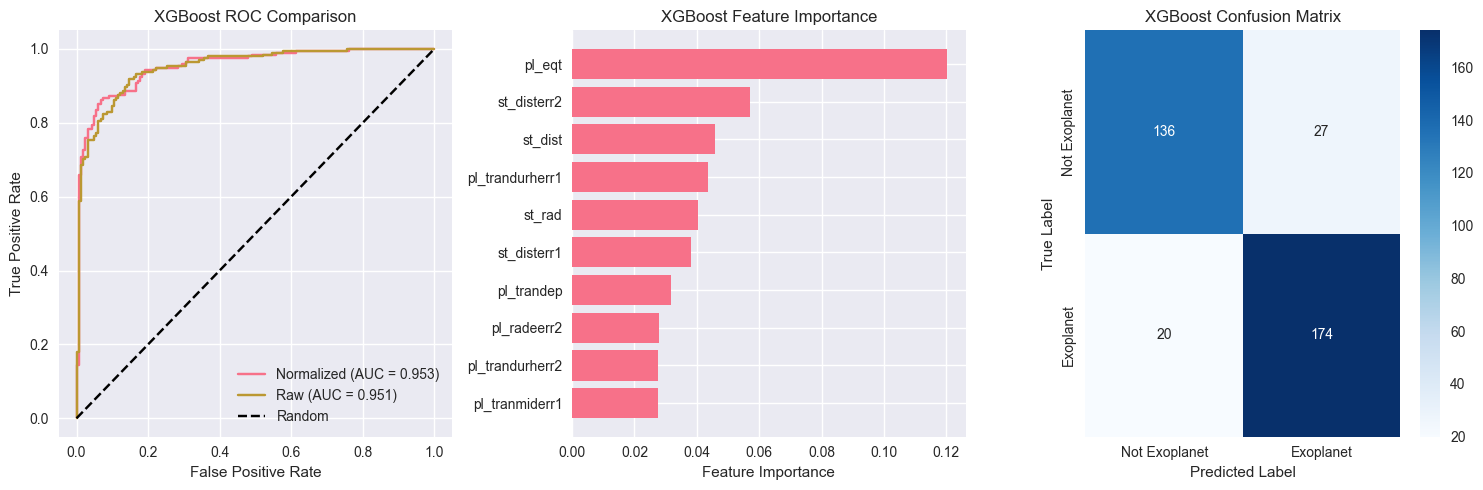

In [17]:
# XGBoost Training - Normalized Data
if y is not None:
    print("Training XGBoost model on NORMALIZED data...")
    print("=" * 60)
    
    # XGBoost parameters
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'early_stopping_rounds': 10,
        'random_state': 42
    }
    
    # Create and train XGBoost model on normalized data
    xgb_model_norm = xgb.XGBClassifier(**xgb_params)
    
    # Train with early stopping
    try:
        xgb_model_norm.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    except TypeError:
        xgb_params_fallback = xgb_params.copy()
        xgb_params_fallback.pop('early_stopping_rounds', None)
        xgb_model_norm = xgb.XGBClassifier(**xgb_params_fallback)
        xgb_model_norm.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
    
    # Make predictions on normalized data
    y_test_pred_xgb_norm = xgb_model_norm.predict(X_test)
    y_test_proba_xgb_norm = xgb_model_norm.predict_proba(X_test)[:, 1]
    test_auc_xgb_norm = roc_auc_score(y_test, y_test_proba_xgb_norm)
    
    print(f"✅ XGBoost (Normalized) - Test AUC: {test_auc_xgb_norm:.4f}")
    
    # XGBoost Training - Raw Data
    print("\nTraining XGBoost model on RAW data...")
    print("=" * 60)
    
    # Create and train XGBoost model on raw data
    xgb_model_raw = xgb.XGBClassifier(**xgb_params)
    
    try:
        xgb_model_raw.fit(X_train_raw, y_train, eval_set=[(X_val_raw, y_val)], verbose=False)
    except TypeError:
        xgb_params_fallback = xgb_params.copy()
        xgb_params_fallback.pop('early_stopping_rounds', None)
        xgb_model_raw = xgb.XGBClassifier(**xgb_params_fallback)
        xgb_model_raw.fit(X_train_raw, y_train, eval_set=[(X_val_raw, y_val)], early_stopping_rounds=10, verbose=False)
    
    # Make predictions on raw data
    y_test_pred_xgb_raw = xgb_model_raw.predict(X_test_raw)
    y_test_proba_xgb_raw = xgb_model_raw.predict_proba(X_test_raw)[:, 1]
    test_auc_xgb_raw = roc_auc_score(y_test, y_test_proba_xgb_raw)
    
    print(f"✅ XGBoost (Raw) - Test AUC: {test_auc_xgb_raw:.4f}")
    
    # Comparison
    print(f"\n📊 XGBoost Comparison:")
    print(f"Normalized Data AUC: {test_auc_xgb_norm:.4f}")
    print(f"Raw Data AUC: {test_auc_xgb_raw:.4f}")
    print(f"Difference: {abs(test_auc_xgb_norm - test_auc_xgb_raw):.4f}")
    
    # Use the better performing model as the main model
    if test_auc_xgb_norm >= test_auc_xgb_raw:
        xgb_model = xgb_model_norm
        y_test_pred_xgb = y_test_pred_xgb_norm
        y_test_proba_xgb = y_test_proba_xgb_norm
        test_auc = test_auc_xgb_norm
        print("✅ Using normalized data model as primary")
    else:
        xgb_model = xgb_model_raw
        y_test_pred_xgb = y_test_pred_xgb_raw
        y_test_proba_xgb = y_test_proba_xgb_raw
        test_auc = test_auc_xgb_raw
        print("✅ Using raw data model as primary")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_scaled.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Plot comparison
    plt.figure(figsize=(15, 5))
    
    # ROC curves comparison
    plt.subplot(1, 3, 1)
    fpr_norm, tpr_norm, _ = roc_curve(y_test, y_test_proba_xgb_norm)
    fpr_raw, tpr_raw, _ = roc_curve(y_test, y_test_proba_xgb_raw)
    plt.plot(fpr_norm, tpr_norm, label=f'Normalized (AUC = {test_auc_xgb_norm:.3f})')
    plt.plot(fpr_raw, tpr_raw, label=f'Raw (AUC = {test_auc_xgb_raw:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost ROC Comparison')
    plt.legend()
    plt.grid(True)
    
    # Feature importance
    plt.subplot(1, 3, 2)
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('XGBoost Feature Importance')
    plt.gca().invert_yaxis()
    
    # Confusion Matrix
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, y_test_pred_xgb)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Exoplanet', 'Exoplanet'],
                yticklabels=['Not Exoplanet', 'Exoplanet'])
    plt.title('XGBoost Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Cannot train XGBoost without target variable.")


## 9. Model Saving and Summary


In [24]:
# Save models and preprocessing objects
if y is not None:
    import joblib
    import os
    
    # Create models directory
    os.makedirs('models', exist_ok=True)
    
    # Save models
    if 'xgb_model' in locals():
        joblib.dump(xgb_model, 'models/xgb_model.pkl')
        print("✅ XGBoost model saved to models/xgb_model.pkl")
    
    if 'cb_model' in locals():
        joblib.dump(cb_model, 'models/cb_model.pkl')
        print("✅ CatBoost/Random Forest model saved to models/cb_model.pkl")
    
    if 'svm_model' in locals():
        joblib.dump(svm_model, 'models/svm_model.pkl')
        print("✅ SVM model saved to models/svm_model.pkl")
    
    # Save preprocessing objects
    joblib.dump(scaler, 'models/scaler.pkl')
    print("✅ Scaler saved to models/scaler.pkl")
    
    # Save feature names
    joblib.dump(list(X_scaled.columns), 'models/feature_names.pkl')
    print("✅ Feature names saved to models/feature_names.pkl")
    
    print("\n🎉 All models and preprocessing objects saved successfully!")
    
    # Summary
    print("\n" + "="*80)
    print("EXOPLANET DETECTION MODEL SUMMARY")
    print("="*80)
    print(f"Dataset size: {len(df)} samples")
    print(f"Features: {X_scaled.shape[1]}")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Exoplanet ratio: {y.mean():.3f}")
    
    # Model performance summary
    if 'comparison_df' in locals():
        print(f"\n📊 Model Performance Summary:")
        for _, row in comparison_df.iterrows():
            print(f"  {row['Model']}: {row['Test AUC']:.4f} AUC")
        
        best_model_idx = comparison_df['Test AUC'].idxmax()
        best_model_name = comparison_df.loc[best_model_idx, 'Model']
        best_auc = comparison_df.loc[best_model_idx, 'Test AUC']
        print(f"\n🏆 Best Model: {best_model_name} with AUC: {best_auc:.4f}")
    
    print(f"\n✅ Models are ready for deployment!")
    print("="*80)
    
else:
    print("Cannot save models without target variable.")


✅ XGBoost model saved to models/xgb_model.pkl
✅ CatBoost/Random Forest model saved to models/cb_model.pkl
✅ SVM model saved to models/svm_model.pkl
✅ Scaler saved to models/scaler.pkl
✅ Feature names saved to models/feature_names.pkl

🎉 All models and preprocessing objects saved successfully!

EXOPLANET DETECTION MODEL SUMMARY
Dataset size: 1782 samples
Features: 40
Training samples: 1069
Validation samples: 356
Test samples: 357
Exoplanet ratio: 0.544

📊 Model Performance Summary:
  XGBoost: 0.9534 AUC
  CatBoost/Random Forest: 0.9438 AUC
  SVM: 0.9041 AUC

🏆 Best Model: XGBoost with AUC: 0.9534

✅ Models are ready for deployment!


## 6. CatBoost Training and Evaluation (Normalized vs Raw Data)


In [28]:
# CatBoost Training
if y is not None:
    print("Training CatBoost model...")
    print("=" * 50)
    
    # CatBoost parameters
    cb_params = {
        'iterations': 100,
        'learning_rate': 0.1,
        'depth': 6,
        'l2_leaf_reg': 3,
        'bootstrap_type': 'Bayesian',
        'random_seed': 42,
        'od_type': 'Iter',
        'od_wait': 10,
        'verbose': False
    }
    
    # Create and train CatBoost model
    cb_model = cb.CatBoostClassifier(**cb_params)
    
    # Train with early stopping
    cb_model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        early_stopping_rounds=10,
        verbose=False
    )
    
    print(f"CatBoost training completed!")
    print(f"Best iteration: {cb_model.get_best_iteration()}")
    print(f"Best score: {cb_model.get_best_score()['validation']['Logloss']:.4f}")
    
    # Make predictions
    y_train_pred_cb = cb_model.predict(X_train)
    y_val_pred_cb = cb_model.predict(X_val)
    y_test_pred_cb = cb_model.predict(X_test)
    
    y_train_proba_cb = cb_model.predict_proba(X_train)[:, 1]
    y_val_proba_cb = cb_model.predict_proba(X_val)[:, 1]
    y_test_proba_cb = cb_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    print("\nCatBoost Performance:")
    print("-" * 30)
    
    # Training set
    train_auc_cb = roc_auc_score(y_train, y_train_proba_cb)
    print(f"Training AUC: {train_auc_cb:.4f}")
    
    # Validation set
    val_auc_cb = roc_auc_score(y_val, y_val_proba_cb)
    print(f"Validation AUC: {val_auc_cb:.4f}")
    
    # Test set
    test_auc_cb = roc_auc_score(y_test, y_test_proba_cb)
    print(f"Test AUC: {test_auc_cb:.4f}")
    
    # Classification report for test set
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred_cb, target_names=['Not Exoplanet', 'Exoplanet']))
    
    # Feature importance
    feature_importance_cb = pd.DataFrame({
        'feature': X_scaled.columns,
        'importance': cb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance_cb.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features_cb = feature_importance_cb.head(15)
    plt.barh(range(len(top_features_cb)), top_features_cb['importance'])
    plt.yticks(range(len(top_features_cb)), top_features_cb['feature'])
    plt.xlabel('Feature Importance')
    plt.title('CatBoost Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr_cb, tpr_cb, _ = roc_curve(y_test, y_test_proba_cb)
    plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {test_auc_cb:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - CatBoost')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm_cb = confusion_matrix(y_test, y_test_pred_cb)
    sns.heatmap(cm_cb, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Exoplanet', 'Exoplanet'],
                yticklabels=['Not Exoplanet', 'Exoplanet'])
    plt.title('CatBoost Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
else:
    print("Cannot train CatBoost without target variable.")


Training CatBoost model...


NameError: name 'cb' is not defined

## 7. Model Comparison


In [ ]:
# Model Comparison
if y is not None and 'xgb_model' in locals() and 'cb_model' in locals():
    print("Model Comparison")
    print("=" * 50)
    
    # Create comparison DataFrame
    comparison_data = {
        'Model': ['XGBoost', 'CatBoost'],
        'Test AUC': [test_auc, test_auc_cb],
        'Validation AUC': [val_auc, val_auc_cb],
        'Training AUC': [train_auc, train_auc_cb]
    }
    
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))
    
    # Plot comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # AUC comparison
    comparison_df.set_index('Model')[['Training AUC', 'Validation AUC', 'Test AUC']].plot(
        kind='bar', ax=axes[0], title='AUC Comparison'
    )
    axes[0].set_ylabel('AUC Score')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].tick_params(axis='x', rotation=45)
    
    # ROC curves comparison
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
    fpr_cb, tpr_cb, _ = roc_curve(y_test, y_test_proba_cb)
    
    axes[1].plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {test_auc:.3f})')
    axes[1].plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {test_auc_cb:.3f})')
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curves Comparison')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance comparison
    plt.figure(figsize=(12, 8))
    
    # Merge feature importances
    importance_comparison = pd.merge(
        feature_importance.rename(columns={'importance': 'XGBoost'}),
        feature_importance_cb.rename(columns={'importance': 'CatBoost'}),
        on='feature'
    ).set_index('feature')
    
    # Plot top 10 features
    top_10_features = importance_comparison.head(10)
    top_10_features.plot(kind='barh', ax=plt.gca())
    plt.title('Feature Importance Comparison (Top 10)')
    plt.xlabel('Importance')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Determine best model
    if test_auc > test_auc_cb:
        best_model = 'XGBoost'
        best_auc = test_auc
    else:
        best_model = 'CatBoost'
        best_auc = test_auc_cb
    
    print(f"\nBest Model: {best_model} with Test AUC: {best_auc:.4f}")
    
else:
    print("Cannot compare models without both trained models.")


## 8. Model Saving and Summary


In [ ]:
# Save models and preprocessing objects
if y is not None:
    import joblib
    import os
    
    # Create models directory
    os.makedirs('models', exist_ok=True)
    
    # Save models
    if 'xgb_model' in locals():
        joblib.dump(xgb_model, 'models/xgb_model.pkl')
        print("XGBoost model saved to models/xgb_model.pkl")
    
    if 'cb_model' in locals():
        joblib.dump(cb_model, 'models/cb_model.pkl')
        print("CatBoost model saved to models/cb_model.pkl")
    
    # No preprocessing objects to save (using raw data)
    print("No preprocessing objects needed (using raw data)")
    
    # Save feature names
    joblib.dump(list(X_scaled.columns), 'models/feature_names.pkl')
    print("Feature names saved")
    
    print("\nAll models and preprocessing objects saved successfully!")
    
    # Summary
    print("\n" + "="*60)
    print("EXOPLANET DETECTION MODEL SUMMARY")
    print("="*60)
    print(f"Dataset size: {len(df)} samples")
    print(f"Features: {X_scaled.shape[1]}")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Exoplanet ratio: {y.mean():.3f}")
    
    if 'xgb_model' in locals() and 'cb_model' in locals():
        print(f"\nBest performing model: {best_model}")
        print(f"Best test AUC: {best_auc:.4f}")
    
    print("\nModels are ready for deployment!")
    print("="*60)
    
else:
    print("Cannot save models without target variable.")
